In [113]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
#Problem 1
def phi(interval, nodes):
    #Interval is an array with 2 entries, could add an error message if interval is longer than 2
    #entries but seems unnecessary.
    t = np.full_like(np.arange(len(nodes), dtype=float), (interval[1]+interval[0])/2)
    #t = np.full((interval[1]+interval[0])/2, int(len(nodes)))
    return ((interval[1]-interval[0])/2)*nodes + t

In [115]:
def chebyshev(n):
    cheb = []
    for i in range(1, n+1):
        cheb += [np.cos(((2*i-1)/(2*n))*np.pi)]
    return np.array(sorted(cheb))

In [116]:
def runge(x):
    return (1/(x**2+1))

In [117]:
def lagInterp(x, y, evaluate):
    solution = []
    #if(len(evaluate)==1):
    val = 0
    for point in evaluate:
        val = 0
        for i in range(len(x)):
            li = 1
            #print("This is i", i)
            for j in range(len(x)):
                if(j==i):
                    continue
                #print("This is i an j", i, j)
                if(x[i]==x[j]):
                    print("Divide by zero!", i, j)
                li = li*((point-x[j])/(x[i]-x[j]))
                #print("This is li", li)
    #print("This is point name", point)
        
            val += li*y[i]
            #print("This is val", val)
        solution += [val]
    return np.array(solution)

In [118]:
#Smooth function
def smooth(x):
    return np.exp(x)

Text(0.5, 1.0, 'Interpolation')

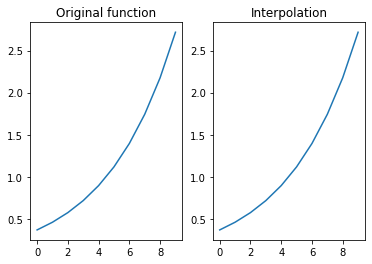

In [119]:
#Testing for the a smooth function on [-1, 1] with equidistant nodes
x = np.linspace(-1, 1, 10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
plt.subplot(1,2,1)
plt.plot(y)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

Text(0.5, 1.0, 'Interpolation')

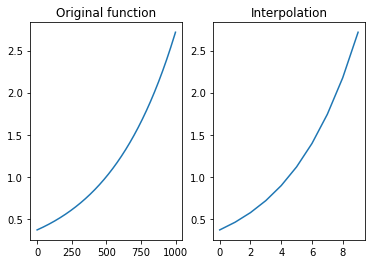

In [124]:
#Testing for the a smooth function on [-1, 1] with Chebyshev nodes
x = chebyshev(10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
y_true = smooth(np.linspace(-1,1,1000))

plt.subplot(1,2,1)
plt.plot(y_true)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

In [139]:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 10
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)

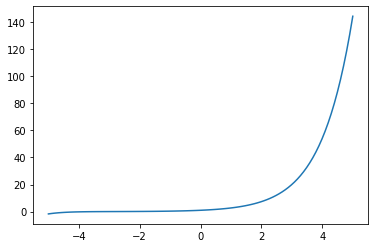

In [140]:
plt.plot(eval_equi, equi)
#We see that the interpolation on equidistant nodes diverges

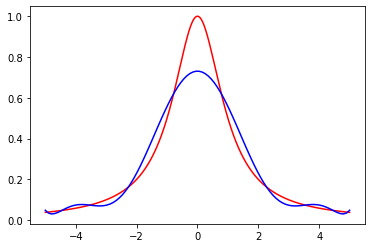

In [141]:
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#CHebyshev nodes converge

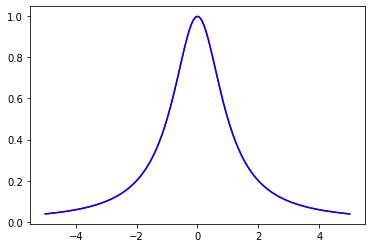

In [142]:
#If we increase n:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 100
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#We get good convergence at high n

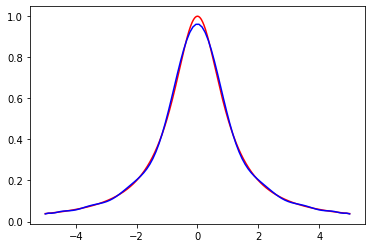

In [143]:
#At a minor increase in n n=20:
n = 20
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r',  x_test, cheb, 'b')
#We start to get good performance

In [144]:
#Problem 1b
def f_1(x):
    return np.cos(2*np.pi*x)
    
def f_2(x):
    return (np.exp(3*x))*np.sin(2*x)

In [366]:
def infNorm(function, interpolation):
    return np.max(np.abs(function - interpolation))

def twoNorm(function, interpolation, interval):
    #print("This is function", function)
    #print("This is interpolation", interpolation)
    return (np.sqrt(interval[1]-interval[0])/np.sqrt(len(function)))*((np.sum((function-interpolation)**2))**2)

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20
n =  21
n =  22
n =  23
n =  24


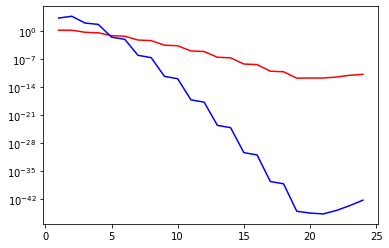

In [403]:
#Making estimated error plots
nVals = np.arange(1, 25, 1)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm, 'r', nVals, tNorm, 'b')

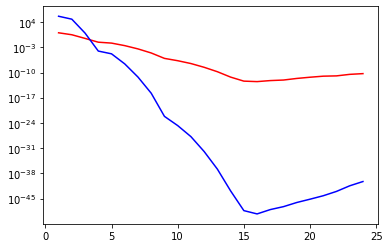

In [404]:
#For function f_2
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    nLarge = 100*n
    x = np.linspace(0, np.pi/4, n)
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              


plt.semilogy(nVals, iNorm, 'r', nVals, tNorm, 'b')

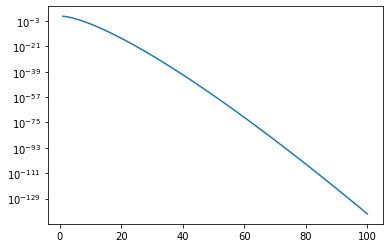

In [167]:
#Calculating for well known error bound
def error_bound_f_1(n):
    return np.pi**(n+1)/((2**n)*np.math.factorial(n+1))

n = np.linspace(1,100, 100)
vec_1 = np.vectorize(error_bound_f_1)
plt.semilogy(n, vec_1(n))

In [406]:
#Problem c
def pieceWise(numberOfSubintervals, interval, function, nodes=5):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

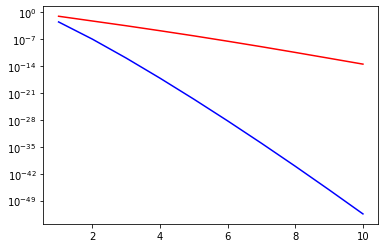

In [407]:
#For n = [1, ..10], we observe the difference in n for K=5 for the interval [0,1] and the function f_1
infList = np.array([])
twoList = np.array([])
n_vals = np.arange(1, 11, 1)

for n in n_vals:
    _, _, infl, twol = pieceWise(8, [0,1], f_1, n)
    infList = np.append(infList, infl)
    twoList = np.append(twoList, twol)
plt.semilogy(n_vals, infList, 'r', n_vals, twoList, 'b')

In [409]:
#Fixing n=10, we observe the the norm as k goes to infinity
normList = np.array([])
kVals = np.arange(2, 21)
for k in kVals:
    _, _, normval, _ = pieceWise(k, [0,1], f_1, 10)
    normList = np.append(normList, normval)
    print("We are on k=", k)

We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20


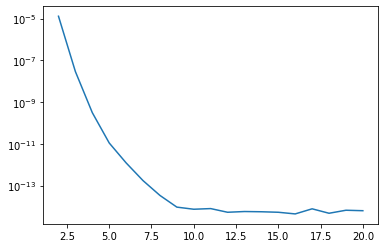

In [410]:
plt.semilogy(kVals, normList)

Text(0.5, 1.0, 'Piecewise method')

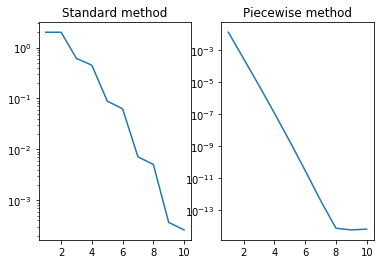

In [413]:
#Comparing the methods in b) and c) for k=8
normListStandard = np.array([])
normListPiecewise = np.array([])
nVals = np.arange(1,11, 1)
for n in nVals:
    _, _, normval, _ = pieceWise(k, [0,1], f_1, n)
    normListPiecewise = np.append(normListPiecewise, normval)
    
    nLarge = 100*n
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    normListStandard = np.append(normListStandard, infNorm(f_1(manyPoints), interpolation))

plt.subplot(1,2,1)
plt.semilogy(nVals, normListStandard)
plt.title("Standard method")

plt.subplot(1,2,2)
plt.semilogy(nVals, normListPiecewise)
plt.title("Piecewise method")

In [178]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad

In [72]:
#Problem d

def interp(x, eta, function):
    poly = 0
    for i in range(len(x)):
        li = 1
        for j in range(len(x)):
            if(i==j):
                continue
            if((x[i]-x[j])==0.0):
                print("Divide by 0 at",i,j)
            li = li*((eta-x[j])/(x[i]-x[j]))
        poly += li*function(x[i])
    return poly
        

def cost(x, eta, interval, function):
    val = 0
    for i in range(len(eta)):
        val += (function(eta[i])-interp(x, eta[i], function))**2
    return ((interval[1]-interval[0])/len(eta))*val

In [103]:
x = np.linspace(0, 1, 10)
eta = np.random.uniform(0,1,100)
cost_test = cost(x, eta, [0,1], f_1)

In [98]:
grad_cost = grad(cost, 0)

In [99]:
grad_cost_test = grad_cost(x, eta, [0,1], f_1)

In [104]:
cost_test

1.0455434743403324e-08

In [424]:
def new_gradient_descent(x, eta, interval, function, max_iter = 25, tol = 1e-7):
    c = 1e-4
    gradient = grad(cost, 0)
    p_k = -(gradient(x, eta, interval, function))
    
    norm_p_k = np.linalg.norm(p_k)
    norm_list = [norm_p_k]
    while norm_p_k>tol and max_iter > 0:
        alpha = 10
        print("This is norm", norm_p_k)
        print("This is x", x)
        rhs = (cost(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        while(cost(x+alpha*p_k, eta, interval, function))>rhs:
            print("We are in backtrack", alpha)
            alpha = alpha*0.5
            rhs = (cost(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
            
        
        x = x + alpha*p_k
        p_k = -(gradient(x, eta, interval, function))
        norm_p_k = np.linalg.norm(p_k)
        norm_list += [norm_p_k]
        max_iter-=1
    return x, norm_list

In [356]:
eta = np.linspace(0, 1, 1000)
x = np.linspace(0,1,6)
t = np.random.uniform(0,1,10)

In [388]:
interp_gd, grad_val = new_gradient_descent(x, eta, [0,1], f_1)

This is norm 0.01981713071199395
This is x [0.  0.2 0.4 0.6 0.8 1. ]
We are in backtrack 10
This is norm 0.011293259281385934
This is x [0.06523896 0.17512434 0.39416364 0.60583636 0.82487566 0.93476104]
We are in backtrack 10
This is norm 0.0027536820303761065
This is x [0.02630284 0.16682332 0.39111524 0.60888476 0.83317668 0.97369716]
We are in backtrack 10
This is norm 0.0007046862319154068
This is x [0.03572056 0.16830963 0.38914498 0.61085502 0.83169037 0.96427944]
This is norm 0.0007198623234771688
This is x [0.03226406 0.17063612 0.386412   0.613588   0.82936388 0.96773594]
We are in backtrack 10
This is norm 0.00024958345956810774
This is x [0.03463169 0.17101488 0.38555855 0.61444145 0.82898512 0.96536831]
This is norm 0.0002385860168377575
This is x [0.03360082 0.1715374  0.38422481 0.61577519 0.8284626  0.96639918]
This is norm 0.0003066797826560733
This is x [0.03506698 0.17170765 0.38340777 0.61659223 0.82829235 0.96493302]
We are in backtrack 10
This is norm 8.5528435901

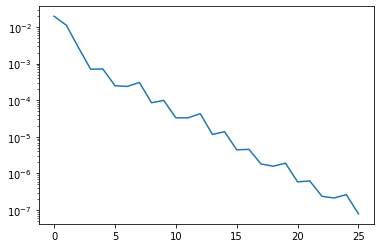

In [390]:
plt.semilogy(grad_val)

In [224]:
#Testing with runge function:
eta = np.linspace(-5, 5, 100)
x = np.linspace(-5,5,5)
y, grad_val = new_gradient_descent(x, eta, [-5,5], runge)

This is norm 0.9610693170169878
This is x [-5.  -2.5  0.   2.5  5. ]
We are in backtrack 10
This is norm 0.4644465595347206
This is x [-2.77111660e+00 -5.06471376e+00 -6.00376953e-17  5.06471376e+00
  2.77111660e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.14871165731289815
This is x [-3.24551248e+00 -4.39460616e+00  3.34140945e-15  4.39460616e+00
  3.24551248e+00]
We are in backtrack 10
This is norm 0.08220535453230285
This is x [-2.79302274e+00 -4.66236072e+00  6.45944954e-14  4.66236072e+00
  2.79302274e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.07135612168310809
This is x [-2.84835598e+00 -4.52798770e+00  5.86702351e-13  4.52798770e+00
  2.84835598e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.06098933867878639
This is x [-2.83208838e+00 -4.65307533e+00  5.37066583e-12  4.65307533e+00
  2.83208838e+00]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.05286689659458491
This is x [-2.83251809e+00 -4.54526

KeyboardInterrupt: 

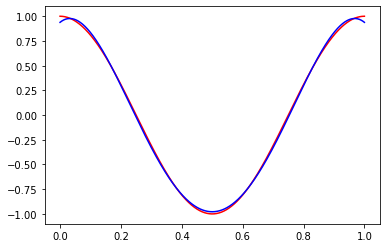

In [392]:
#Plotting the interpolation function versus the true function

x_true = np.linspace(0,1,1000)
y_true = f_1(x_true)
plt.plot(x_true, y_true, 'r',  eta, interp(interp_gd, eta, f_1), 'b')

In [492]:
#Adapting the piecewise function for gradient descent
#x, eta, interval, function, max_iter = 40, tol = 1e-7
def pieceWise_gd(numberOfSubintervals, interval, function, nodes=4):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = phi([subIntervals[i-1],subIntervals[i]], chebyshev(nodes+1))
        #x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        eta = np.linspace(interval[0], interval[1], 100)
        x, _ = new_gradient_descent(x, eta,[subIntervals[i-1], subIntervals[i]] , function, 15, 1e-5)      
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

In [ ]:
#Test of piecewise gd
solution, func_points, iNorm, tNorm = pieceWise_gd(8, [0,1], f_1)

In [495]:
#Compare results for different values of n for f_1
n_vals = np.arange(1, 6, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace(0,1, 1000)

#For lagrangian
for n in n_vals:
    print("This is n", n)
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal_equidistant, _ = new_gradient_descent(x, eta, [0,1], f_1)
    
    evalu = np.linspace(0,1, 100)
    
    interp_equidistant = lagInterp(x, f_1(x), evalu)
    interp_chebishev = lagInterp(cheb, f_1(cheb), evalu)
    interp_optimal = lagInterp(optimal, f_1(optimal), evalu)
    
    error_equidistant = np.append(error_equidistant, twoNorm(f_1(evalu), interp_equidistant, [0,1]))
    error_chebishev = np.append(error_chebishev, twoNorm(f_1(evalu), interp_chebishev, [0,1]))
    error_optimised = np.append(error_optimised, twoNorm(f_1(evalu), interp_optimal, [0,1]))

This is n 1
This is n 2
This is n 3
This is norm 1.5368359502799604
This is x [0.  0.5 1. ]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
This is norm 0.05637546665929625
This is x [0.08489899 0.5        0.91510101]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
This is norm 0.005643551514175448
This is x [0.08178466 0.5        0.91821534]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrack 0.3125
We are in backtrack 0.15625
This is norm 0.0005642820879337073
This is x [0.08209643 0.5        0.91790357]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
We are in backtrack 0.625
We are in backtrac

KeyboardInterrupt: 

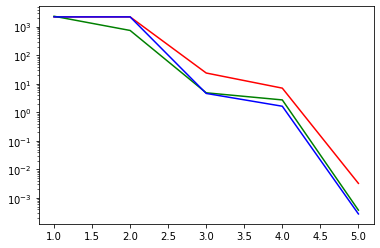

In [429]:
plt.semilogy(n_vals, error_equidistant, 'r', n_vals, error_chebishev,'g', n_vals, error_optimised, 'b')
#plt.plot(n_vals, error_equidistant)

In [ ]:
n_vals = np.arange(1, 6, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace(0,1, 1000)

#For piecewise
for n in n_vals:
    print("This is n", n)
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _ = new_gradient_descent(x, eta, [0,1], f_1)
    
    evalu = np.linspace(0,1, 100)
    
    numberOfSubintervals, interval, function, nodes=5
    _, _, _, equi_norm = pieceWise(8, [0,1], f_1, n)
    _, _, _, cheb_norm= pieceWise(8, [0,1], f_1, n)
    _, _, _, opti_norm= pieceWise(8, [0,1], f_1, n)
    
    error_equidistant = np.append(error_equidistant, twoNorm(f_1(evalu), interp_equidistant, [0,1]))
    error_chebishev = np.append(error_chebishev, twoNorm(f_1(evalu), interp_chebishev, [0,1]))
    error_optimised = np.append(error_optimised, twoNorm(f_1(evalu), interp_optimal, [0,1]))

In [415]:
#Compare results for different values of n for f_2
n_vals = np.arange(2, 10, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace()

#For lagrangian
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = new_gradient_descent(x, eta, [0,1], f_2)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))
    
error_equidistant = np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
    
#For piecewise
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = gradient_descent(x, eta, [0,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))

SyntaxError: invalid syntax (<ipython-input-415-abd4a13da4f2>, line 16)

In [426]:
#Compare results for different values of n for runge
n_vals = np.arange(2, 7, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace(-1, 1, 1000)

#For lagrangian
for n in n_vals:
    print("This is n", n)
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    optimal, _, = new_gradient_descent(x, eta, [-1,1], runge)
    evalu = np.linspace(0,1, 100)
    
    interp_equidistant = lagInterp(x, runge(x), evalu)
    print(len(interp_equidistant))
    interp_chebishev = lagInterp(cheb, runge(cheb), evalu)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    
    error_equidistant=np.append(error_equidistant, twoNorm(runge(evalu), interp_equidistant, [-1,1]))
    error_chebishev =np.append(error_chebishev, twoNorm(runge(evalu), interp_chebishev, [-1,1]))
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))
    

    

This is n 2
This is norm 0.40321010346149316
This is x [-1.  1.]
We are in backtrack 10
This is norm 0.10622135828136883
This is x [ 0.42556299 -0.42556299]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.10710717780478624
This is x [ 0.6133376 -0.6133376]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 0.005282941522822171
This is x [ 0.51866733 -0.51866733]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 0.00020102611383564993
This is x [ 0.52333684 -0.52333684]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 8.042052585328272e-06
This is x [ 0.52315916 -0.52315916]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 3.2114879433653297e-07
This is x [ 0.52316626 -0.52316626]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
100
This is n 3
This is norm 0.026463610445678208
This is x [-1.  0.  1.]
This is norm 0.

This is norm 0.0003435975657866744
This is x [-0.95661104 -0.61812373 -0.20630448  0.20630448  0.61812373  0.95661104]
This is norm 0.0003166736209117293
This is x [-0.9543633  -0.61896357 -0.20668568  0.20668568  0.61896357  0.9543633 ]
This is norm 0.0002921959333638215
This is x [-0.95229473 -0.61973935 -0.20705077  0.20705077  0.61973935  0.95229473]
This is norm 0.000269908577775919
This is x [-0.95039005 -0.62045911 -0.20740154  0.20740154  0.62045911  0.95039005]
This is norm 0.0002495897366890431
This is x [-0.94863546 -0.62112973 -0.20773951  0.20773951  0.62112973  0.94863546]
This is norm 0.0002310458218940873
This is x [-0.94701847 -0.62175704 -0.20806599  0.20806599  0.62175704  0.94701847]
This is norm 0.0002141068116587278
This is x [-0.94552775 -0.62234605 -0.20838207  0.20838207  0.62234605  0.94552775]
This is norm 0.00019862252137400522
This is x [-0.94415296 -0.62290105 -0.20868871  0.20868871  0.62290105  0.94415296]
This is norm 0.00018445959597764635
This is x [-

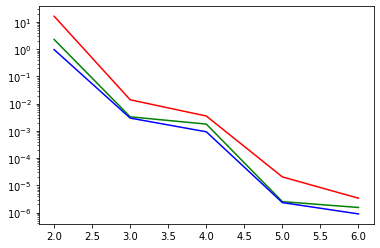

In [427]:
plt.semilogy(n_vals, error_equidistant, 'r', n_vals, error_chebishev,'g', n_vals, error_optimised, 'b')

In [ ]:
#For piecewise

error_equidistant = np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])
for n in n_vals:
    x = np.linspace(0,1,n)
    cheb = phi([0, 1], chebyshev(n))
    optimal, _, _ = gradient_descent(x, eta, [-1,1], 0.1)
    
    interp_equidistant =
    interp_chebishev = 
    interp_optimal =
    
    np.append(error_equidistant, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_chebishev, twoNorm(f_1(x), interp, [0,1]))
    np.append(error_optimised, twoNorm(f_1(x), interp, [0,1]))

In [233]:
a = np.array([1,2, 3,4])
a[:-1]

array([1, 2, 3])

In [239]:
m = np.array([])
for i in range

0.007907054051593435

In [458]:
#e

def psi(x, shape):
    return np.exp(-((shape*x)**2))

def f_aprox(x, shape, eta, function):
    m = np.empty([(len(x)), (len(x))])
    for i in range(len(x)):
        for j in range(len(x)):
            m[i,j] = psi(np.abs(x[i]-x[j]), shape)
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx

def cost2(x, shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
def f_aprox_grad(x, shape, eta, function):
    m = np.empty([(len(x)), (len(x))])
    for i in range(len(x)):
        for j in range(len(x)):
            m[i,j] = psi(np.abs(x[i]-x[j]), shape)._value
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx

def cost2_grad(x, shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox_grad(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
    
    
    
def f_3(x):
    return (0.75*(np.exp((-(9*x-2)**2)/4)))+np.exp((-(9*x+1)**2)/49)+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

In [292]:
grad_cost_2 = grad(cost2_grad,(0,1))

In [256]:
y = np.linspace(-1,1,5)
shape = 4.0

In [257]:
grad_cost_2(y, shape, eta, [-1, 1], runge)

(array([-1.31204580e-01, -2.02574991e-01,  2.07371048e-16,  2.02574991e-01,
         1.31204580e-01]), array(0.10971655))

In [487]:
def gradient_descent2(x, shape, eta, interval, function, max_iter = 20, tol = 1e-7):
    x = x
    shape = shape
    c = 10**-4
    gradient = grad(cost2_grad,(0,1))
    combined = gradient(x,shape, eta, interval, function)
    p_k = -np.append(combined[0], combined[1])
    norm_p_k = np.linalg.norm(p_k)
    grad_norm_list = [norm_p_k]
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", max_iter)
        print("This is shape", shape)
        print("This is p_k", p_k)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = 100
        #rhs = (cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        #lhs = cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)
        #print (lhs, rhs)
        while cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)>(cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k)):
            #print("We are on alpha", alpha)
            alpha = 0.9*alpha
        x = x + alpha*p_k[:-1]
        shape = shape + alpha*p_k[-1]
        combined = gradient(x,shape, eta, interval, function)
        p_k = -np.append(combined[0], combined[1])
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list += [norm_p_k]
        #if(any(i > 1.00001 for i in np.abs(x))):
            #print("Val is greater than abs(1)")
            #return False
        #if (grad_norm_list[-1]-grad_norm_list[-2]<1e-10):
            #print("Delta grad is smaller than 1e-10")
            #return False
    return True

In [540]:
def gradient_descent2(x, shape, eta, interval, function, max_iter = 1000, tol = 1e-15):
    x = x
    shape = shape
    c = 10**-4
    gradient = grad(cost2_grad,(0,1))
    combined = gradient(x,shape, eta, interval, function)
    p_k = -np.append(combined[0], combined[1])
    norm_p_k = np.linalg.norm(p_k)
    grad_norm_list = [norm_p_k]
    iterations_at_minima = 0
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", max_iter)
        print("This is shape", shape)
        print("This is p_k", p_k)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = 1
        #rhs = (cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        #lhs = cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)
        #print (lhs, rhs)
        while cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)>(cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k)):
            #print("We are on alpha", alpha)
            alpha = 0.9*alpha
        x = x + alpha*p_k[:-1]
        shape = shape + alpha*p_k[-1]
        combined = gradient(x,shape, eta, interval, function)
        p_k = -np.append(combined[0], combined[1])
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list += [norm_p_k]
        
        if (np.abs(grad_norm_list[-1]-grad_norm_list[-2])<1e-10):
            print("Delta grad is", grad_norm_list[-1]-grad_norm_list[-2])
            print("Delta grad is smaller than 1e-17")
            if(iterations_at_minima >5):
                return x, shape, grad_norm_list
            else:
                iterations_at_minima += 1
        
    return x, shape, grad_norm_list

In [ ]:
#x = chebyshev(5)
x = np.linspace(-1, 1, 5)
eta = np.linspace(-1,1,100)
shape = 2.0
nodes, shape_param, grad_norms = gradient_descent2(x, shape, eta, [-1,1], runge)

We are on iteration 1000
This is shape 2.0
This is p_k [-8.11730009e-03  6.62491293e-03 -8.33683708e-17 -6.62491293e-03
  8.11730009e-03  4.62702929e-03]
This is the norm 0.015523191178582117
This is x [-1.  -0.5  0.   0.5  1. ]
We are on iteration 999
This is shape 2.004627029294109
This is p_k [-8.01772398e-03  5.99717396e-03 -1.34338842e-17 -5.99717396e-03
  8.01772398e-03  4.95179115e-03]
This is the norm 0.01500067406169195
This is x [-1.00811730e+00 -4.93375087e-01 -8.33683708e-17  4.93375087e-01
  1.00811730e+00]
We are on iteration 998
This is shape 2.009578820444667
This is p_k [-7.68820558e-03  5.34312096e-03 -9.25381008e-17 -5.34312096e-03
  7.68820558e-03  5.03724912e-03]
This is the norm 0.014166466452883029
This is x [-1.01613502e+00 -4.87377913e-01 -9.68022550e-17  4.87377913e-01
  1.01613502e+00]
We are on iteration 997
This is shape 2.0146160695642132
This is p_k [-7.14715214e-03  4.65776769e-03  2.30664987e-16 -4.65776769e-03
  7.14715214e-03  4.90246115e-03]
This is 

We are on iteration 972
This is shape 2.0566155053899733
This is p_k [-4.89665635e-04 -4.96016071e-04 -1.18727177e-16  4.96016071e-04
  4.89665635e-04  6.96544435e-04]
This is the norm 0.0012069726192839353
This is x [-1.07240142e+00 -4.68095785e-01  1.92119617e-16  4.68095785e-01
  1.07240142e+00]
We are on iteration 971
This is shape 2.0573120498245077
This is p_k [-4.88323936e-04 -4.94979768e-04  9.50390811e-17  4.94979768e-04
  4.88323936e-04  6.94684961e-04]
This is the norm 0.0012039591643645245
This is x [-1.07289108e+00 -4.68591801e-01  7.33924398e-17  4.68591801e-01
  1.07289108e+00]
We are on iteration 970
This is shape 2.0580067347853648
This is p_k [-4.87217981e-04 -4.93565348e-04  2.37069042e-17  4.93565348e-04
  4.87217981e-04  6.92897315e-04]
This is the norm 0.0012008675687966298
This is x [-1.07337941e+00 -4.69086780e-01  1.68431521e-16  4.69086780e-01
  1.07337941e+00]
We are on iteration 969
This is shape 2.058699632100646
This is p_k [-4.86241288e-04 -4.91849105e-04

We are on iteration 944
This is shape 2.0750799469783816
This is p_k [-4.35167195e-04 -4.05653033e-04 -2.85850282e-16  4.05653033e-04
  4.35167195e-04  5.98984824e-04]
This is the norm 0.0010327790470585684
This is x [-1.08555294e+00 -4.80972617e-01  3.27164998e-16  4.80972617e-01
  1.08555294e+00]
We are on iteration 943
This is shape 2.0756789318025675
This is p_k [-4.31707137e-04 -4.01122714e-04 -1.34822831e-17  4.01122714e-04
  4.31707137e-04  5.93330752e-04]
This is the norm 0.0010230260749672737
This is x [-1.08598811e+00 -4.81378270e-01  4.13147167e-17  4.81378270e-01
  1.08598811e+00]
We are on iteration 942
This is shape 2.076272262554922
This is p_k [-4.28153752e-04 -3.96540261e-04 -6.33925586e-17  3.96540261e-04
  4.28153752e-04  5.87555076e-04]
This is the norm 0.0010130846925427426
This is x [-1.08641981e+00 -4.81779393e-01  2.78324336e-17  4.81779393e-01
  1.08641981e+00]
We are on iteration 941
This is shape 2.076859817630694
This is p_k [-4.24510141e-04 -3.91909164e-04 

We are on iteration 916
This is shape 2.08942020578172
This is p_k [-3.14363145e-04 -2.70264042e-04 -8.08839624e-18  2.70264042e-04
  3.14363145e-04  4.11507398e-04]
This is the norm 0.0007162904560503192
This is x [-1.09619395e+00 -4.90518378e-01 -1.05756947e-16  4.90518378e-01
  1.09619395e+00]
We are on iteration 915
This is shape 2.0898317131800437
This is p_k [-3.09617595e-04 -2.65524710e-04  1.11733244e-17  2.65524710e-04
  3.09617595e-04  4.04391239e-04]
This is the norm 0.000704460877053469
This is x [-1.09650831e+00 -4.90788642e-01 -1.13845343e-16  4.90788642e-01
  1.09650831e+00]
We are on iteration 914
This is shape 2.0902361044192865
This is p_k [-3.04876815e-04 -2.60818550e-04  8.53494359e-17  2.60818550e-04
  3.04876815e-04  3.97294204e-04]
This is the norm 0.0006926724048586361
This is x [-1.09681793e+00 -4.91054166e-01 -1.02672019e-16  4.91054166e-01
  1.09681793e+00]
We are on iteration 913
This is shape 2.0906333986231123
This is p_k [-3.00143821e-04 -2.56147570e-04 -

We are on iteration 888
This is shape 2.098385310134985
This is p_k [-1.91269706e-04 -1.54823019e-04 -6.07881687e-17  1.54823019e-04
  1.91269706e-04  2.30048154e-04]
This is the norm 0.00041716985590572276
This is x [-1.10327064e+00 -4.96435070e-01  3.57656334e-16  4.96435070e-01
  1.10327064e+00]
We are on iteration 887
This is shape 2.098615358288583
This is p_k [-1.87490981e-04 -1.51480544e-04  1.03437086e-17  1.51480544e-04
  1.87490981e-04  2.24560681e-04]
This is the norm 0.0004081984144524494
This is x [-1.10346191e+00 -4.96589893e-01  2.96868165e-16  4.96589893e-01
  1.10346191e+00]
We are on iteration 886
This is shape 2.098839918969265
This is p_k [-1.83766021e-04 -1.48195275e-04 -2.51809847e-16  1.48195275e-04
  1.83766021e-04  2.19155204e-04]
This is the norm 0.00039936522532591737
This is x [-1.10364940e+00 -4.96741374e-01  3.07211874e-16  4.96741374e-01
  1.10364940e+00]
We are on iteration 885
This is shape 2.099059074173444
This is p_k [-1.80095291e-04 -1.44967078e-04 

We are on iteration 860
This is shape 2.1030221612601725
This is p_k [-1.06105382e-04 -8.16822904e-05 -1.20488500e-16  8.16822904e-05
  1.06105382e-04  1.07255672e-04]
This is the norm 0.00021763381324637748
This is x [-1.10737746e+00 -4.99687596e-01  1.32528646e-16  4.99687596e-01
  1.10737746e+00]
We are on iteration 859
This is shape 2.1031294169322963
This is p_k [-1.03826079e-04 -7.97823423e-05  4.25512614e-17  7.97823423e-05
  1.03826079e-04  1.03992314e-04]
This is the norm 0.00021237833030184376
This is x [-1.10748357e+00 -4.99769278e-01  1.20401459e-17  4.99769278e-01
  1.10748357e+00]
We are on iteration 858
This is shape 2.1032334092463825
This is p_k [-1.01594696e-04 -7.79249885e-05  1.80981045e-17  7.79249885e-05
  1.01594696e-04  1.00798615e-04]
This is the norm 0.00020723883121549747
This is x [-1.10758740e+00 -4.99849061e-01  5.45914073e-17  4.99849061e-01
  1.10758740e+00]
We are on iteration 857
This is shape 2.1033342078618675
This is p_k [-9.94105956e-05 -7.61095152

We are on iteration 832
This is shape 2.104999135030586
This is p_k [-5.81889792e-05 -4.22947923e-05 -1.00973893e-16  4.22947923e-05
  5.81889792e-05  3.88721194e-05]
This is the norm 0.0001089066351246634
This is x [-1.10963010e+00 -5.01381624e-01  6.04562351e-16  5.01381624e-01
  1.10963010e+00]
We are on iteration 831
This is shape 2.1050380071499606
This is p_k [-5.69954138e-05 -4.13279383e-05  1.01089906e-16  4.13279383e-05
  5.69954138e-05  3.71744520e-05]
This is the norm 0.00010627742587846143
This is x [-1.10968829e+00 -5.01423919e-01  5.03588459e-16  5.01423919e-01
  1.10968829e+00]
We are on iteration 830
This is shape 2.105075181601961
This is p_k [-5.58309357e-05 -4.03852877e-05 -1.37582659e-16  4.03852877e-05
  5.58309357e-05  3.55184216e-05]
This is the norm 0.00010371927482736631
This is x [-1.10974528e+00 -5.01465247e-01  6.04678365e-16  5.01465247e-01
  1.10974528e+00]
We are on iteration 829
This is shape 2.105110700023527
This is p_k [-5.46949289e-05 -3.94662933e-05

In [514]:
grad_norms

[0.0]

In [491]:
#Finding stable shape params
x = chebyshev(5)
eta = np.linspace(-1,1,100)
list_truth = []
for shape in np.linspace(1.1, 4.0, 10):
    list_truth += [gradient_descent2(x, shape, eta, [-1,1], runge)]
print(list_truth)

We are on iteration 20
This is shape 1.1
This is p_k [-5.89413690e-04  8.07352252e-04 -1.62221863e-17 -8.07352252e-04
  5.89413690e-04  1.95512929e-04]
This is the norm 0.001427122146224249
This is x [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
We are on iteration 19
This is shape 1.1084161904960739
This is p_k [-1.99914823e-04  7.83326968e-04 -1.44345077e-16 -7.83326968e-04
  1.99914823e-04 -3.86610281e-04]
This is the norm 0.0012068975350675393
This is x [-9.76428843e-01 -5.53031385e-01 -6.37079586e-16  5.53031385e-01
  9.76428843e-01]
We are on iteration 18
This is shape 1.1084161904960708
This is p_k [-1.99914823e-04  7.83326968e-04 -7.87847272e-17 -7.83326968e-04
  1.99914823e-04 -3.86610281e-04]
This is the norm 0.0012068975350674142
This is x [-9.76428843e-01 -5.53031385e-01 -6.37079586e-16  5.53031385e-01
  9.76428843e-01]
We are on iteration 17
This is shape 1.1084161904960708
This is p_k [-1.99914823e-04  7.83326968e-04 -7.87847272e-17 -7

We are on iteration 12
This is shape 1.4222222222222223
This is p_k [-1.45526937e-04  1.03870509e-04  1.31038534e-16 -1.03870509e-04
  1.45526937e-04  2.87745802e-05]
This is the norm 0.000254484421063136
This is x [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
We are on iteration 11
This is shape 1.4222222222222223
This is p_k [-1.45526937e-04  1.03870509e-04  1.31038534e-16 -1.03870509e-04
  1.45526937e-04  2.87745802e-05]
This is the norm 0.000254484421063136
This is x [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
We are on iteration 10
This is shape 1.4222222222222223
This is p_k [-1.45526937e-04  1.03870509e-04  1.31038534e-16 -1.03870509e-04
  1.45526937e-04  2.87745802e-05]
This is the norm 0.000254484421063136
This is x [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
We are on iteration 9
This is shape 1.4222222222222223
This is p_k [-1.45526937e-04  1.03870509e-04  1.310

KeyboardInterrupt: 

In [ ]:
plt.semilogy(grads)

In [348]:
#e
#X contains all the nodes plus a shape parameter at the end
def psi(x, shape):
    return np.exp(-(shape*x)**2)

def f_aprox(x, eta, function):
    m = np.empty([(len(x)-1), (len(x)-1)])
    for i in range(len(x)-1):
        for j in range(len(x)-1):
            m[i,j] = psi(np.abs(x[i]-x[j]), x[-1])
    f = function(x[:-1])
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)-1):
        approx += w[i]*psi(np.abs(eta-x[i]), x[-1])
    return approx

def cost2(x, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox(x, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
def f_aprox_grad(x, eta, function):
    m = np.empty([(len(x)-1), (len(x)-1)])
    for i in range(len(x)-1):
        for j in range(len(x)-1):
            m[i,j] = psi(np.abs(x[i]-x[j]), x[-1])._value
    f = function(x[:-1])
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)-1):
        approx += w[i]*psi(np.abs(eta-x[i]), x[-1])
    return approx


def cost2_grad(x, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox_grad(x, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
    
    
    
def f_3(x):
    return (0.75*(np.exp((-(9*x-2)**2)/4)))+np.exp((-(9*x+1)**2)/49)+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

In [349]:
def new_gradient_descent2(x, eta, interval, function, max_iter = 100, tol = 1e-7):
    c = 1e-4
    gradient = grad(cost2_grad, 0)
    #X contains all the nodes + the shape parameter
    p_k = -(gradient(x, eta, interval, function))
    
    norm_p_k = np.linalg.norm(p_k)
    norm_list = [norm_p_k]
    while norm_p_k>tol and max_iter > 0:
        print("This is max_iter", max_iter)
        alpha = 100
        print("This is norm", norm_p_k)
        print("This is x", x)
        rhs = (cost2(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        while(cost2(x+alpha*p_k, eta, interval, function))>rhs:
            #print("We are in backtrack", alpha)
            alpha = alpha*0.9
            rhs = (cost2(x, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
            
        
        x = x + alpha*p_k
        p_k = -(gradient(x, eta, interval, function))
        norm_p_k = np.linalg.norm(p_k)
        norm_list += [norm_p_k]
        max_iter-=1
    return x, norm_list

In [430]:
x = np.append(np.linspace(-1,1,3),np.array([2.0]))
eta = np.linspace(-1,1,100)
x, norms = new_gradient_descent2(x, eta, [-1,1], runge)

This is max_iter 100
This is norm 0.39696064697604594
This is x [-1.  0.  1.  2.]
This is max_iter 99
This is norm 0.1794203913674693
This is x [ 2.08905988e+00  5.15904070e-16 -2.08905988e+00 -1.10969655e+00]
This is max_iter 98
This is norm 0.11755501180255253
This is x [ 1.94446919e+00 -1.44824133e-14 -1.94446919e+00  1.06203113e+00]
This is max_iter 97
This is norm 0.1049865743756269
This is x [ 1.72546035e+00  5.74038911e-13 -1.72546035e+00 -1.09415532e+00]
This is max_iter 96
This is norm 0.10833635787664668
This is x [ 1.34639716e+00 -2.87490318e-11 -1.34639716e+00  1.24700987e+00]
This is max_iter 95
This is norm 0.06870729969374938
This is x [ 4.81928263e-01  1.79715839e-09 -4.81928264e-01 -1.22050061e+00]
This is max_iter 94
This is norm 0.06583489590571463
This is x [-1.22698357e+00  2.55364523e-08  1.22698356e+00  1.00630701e+00]
This is max_iter 93
This is norm 0.05472482257565672
This is x [-1.29105759e+00 -4.03919969e-08  1.29105761e+00  1.21340710e+00]
This is max_iter 

This is max_iter 31
This is norm 0.0003202427115770819
This is x [-1.24824689e+00  3.31254957e-06  1.24930786e+00  1.15426331e+00]
This is max_iter 30
This is norm 0.00032826719969571047
This is x [-1.24830704e+00  3.57728307e-04  1.24917576e+00  1.15428134e+00]
This is max_iter 29
This is norm 0.00033791988526157195
This is x [-1.24817805e+00 -8.68679500e-06  1.24923266e+00  1.15429947e+00]
This is max_iter 28
This is norm 0.00034644784419089134
This is x [-1.24824346e+00  3.65781816e-04  1.24909535e+00  1.15431746e+00]
This is max_iter 27
This is norm 0.0003566023548972878
This is x [-1.24810905e+00 -2.12124673e-05  1.24915772e+00  1.15433558e+00]
This is max_iter 26
This is norm 0.0003656608399776724
This is x [-1.24818001e+00  3.74426623e-04  1.24901492e+00  1.15435355e+00]
This is max_iter 25
This is norm 0.0003763448355579342
This is x [-1.24803989e+00 -3.42951073e-05  1.24908306e+00  1.15437165e+00]
This is max_iter 24
This is norm 0.0003109141711239288
This is x [-1.24810903e+0

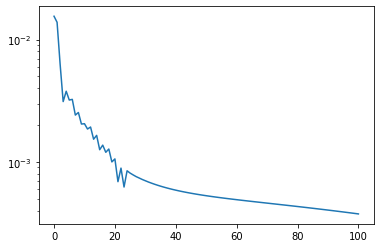

In [354]:
plt.semilogy(norms)